# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
books = pd.read_csv('/content/drive/MyDrive/Dataset/Rekomendasi_Buku/Books.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Dataset/Rekomendasi_Buku/Ratings.csv')
users = pd.read_csv('/content/drive/MyDrive/Dataset/Rekomendasi_Buku/Users.csv')

<ipython-input-97-e055582ad072>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/drive/MyDrive/Dataset/Rekomendasi_Buku/Books.csv')


# Exploratory Data Analysis

### Cek Jumlah Data Unik Pada Tiap Dataset

In [ ]:
print('Jumlah Data Unik Pada Dataset Books:')
print(books.nunique(), '\n')
print('Jumlah Data Unik Pada Dataset Ratings:')
print(ratings.nunique(), '\n')
print('Jumlah Data Unik Pada Dataset Users:')
print(users.nunique())

Jumlah Data Unik Pada Dataset Books:
ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64 

Jumlah Data Unik Pada Dataset Ratings:
User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64 

Jumlah Data Unik Pada Dataset Users:
User-ID     278858
Location     57339
Age            165
dtype: int64


#### Cek Deskripsi Statistik Data Books Menggunakan Fungsi Info()

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


#### Lihat Data Books

In [ ]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


#### Cek Deskripsi Statistik Data Users Menggunakan Fungsi Info()

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Lihat Data Users

In [ ]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


#### Cek Deskripsi Statistik Data Ratings Menggunakan Fungsi Info()

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#### Lihat Data Ratings

In [ ]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


#### Cek Nilai Maksimum Pada Kolom Book-Rating

In [ ]:
ratings['Book-Rating'].max()

10

#### Cek Nilai Minimum Pada Kolom Book-Rating

In [ ]:
ratings['Book-Rating'].min()

0

# Data Preparation

#### Copy Dataframe Ratings ke Variabel df

In [ ]:
df = ratings

#### Ubah Nilai Pada Book-Rating Menjadi Float Pada Dataframe df

In [ ]:
df['Book-Rating'] = df['Book-Rating'].values.astype(float)

#### Ubah User-ID di Dataframe df Menjadi List Tanpa Nilai Yang Sama

In [ ]:
users_id = df['User-ID'].unique().tolist()

#### Lakukan Encoding Pada User-ID

In [ ]:
users_to_encoded = {x: i for i, x in enumerate(users_id)}

#### Encoding Angka ke User-ID

In [ ]:
encoded_to_users = {i: x for i, x in enumerate(users_id)}

#### Ubah ISBN Pada Dataframe df Menjadi List Tanpa Nilai Yang Sama

In [ ]:
isbn = df['ISBN'].unique().tolist()

#### Lakukan Encoding Pada ISBN

In [ ]:
isbn_to_encoded = {x: i for i, x in enumerate(isbn)}

#### Encoding Angka ke ISBN

In [ ]:
encoded_to_isbn = {i: x for i, x in enumerate(isbn)}

#### Mapping User-ID dan ISBN ke Dataframe df

In [ ]:
df['user'] = df['User-ID'].map(users_to_encoded)
df['book'] = df['ISBN'].map(isbn_to_encoded)

#### Membagi Dataframe df Menjadi Data Train dan Data Test Untuk Proses Training dan Validasi


In [ ]:
df = df.sample(frac=1, random_state=420)
df

,User-ID,ISBN,Book-Rating,user,book
105994,24194,0743456866,0.0,9766,11772
1068471,255121,0835604500,0.0,97264,326951
673766,163875,0671721097,0.0,62629,25425
931491,225996,0738702552,0.0,85989,86544
487894,116122,0553270443,0.0,44806,56845
...,...,...,...,...,...
10394,311,0670815373,0.0,959,9639
1049785,251013,0061091561,0.0,95617,21972
178094,38654,0671020307,0.0,15515,37594
510579,123981,0671866885,0.0,47761,154825


#### Mapping Data User dan Book Menjadi Satu Dataframe Tersendiri Sebagai Data Input

In [ ]:
X = df[['user', 'book']].values
X

array([[  9766,  11772],
       [ 97264, 326951],
       [ 62629,  25425],
       ...,
       [ 15515,  37594],
       [ 47761, 154825],
       [ 85907, 302062]])

#### Mapping Data Book-Rating Menjadi Satu Dataframe Tersendiri Sebagai Label

In [ ]:
y = df['Book-Rating'].values
y

array([0., 0., 0., ..., 0., 0., 0.])

#### Scaling Data Menggunakan MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
y = scaler.fit_transform(y.reshape(-1, 1))
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

#### Membagi Data Train dan Data Validasi Dengan Rasio 80:20

In [ ]:
train_samples = int(0.8 * df.shape[0])
X_train, X_test, y_train, y_test = X[:train_samples], X[train_samples:], y[:train_samples], y[train_samples:]

# Modeling and Result

#### Membuat Model Recommender

In [ ]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, num_user, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_user = num_user
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = tf.keras.layers.Embedding(
        num_user,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = tf.keras.regularizers.l2(1e-6)
    )
    self.user_bias = tf.keras.layers.Embedding(num_user, 1)
    self.book_embedding = tf.keras.layers.Embedding(
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = tf.keras.regularizers.l2(1e-6)
    )
    self.book_bias = tf.keras.layers.Embedding(num_book, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    book_vector = self.book_embedding(inputs[:, 1])
    book_bias = self.book_bias(inputs[:, 1])

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x)

#### Menginstansiasi Model

In [ ]:
model = RecommenderNet(num_user = len(users_to_encoded), num_book = len(isbn_to_encoded), embedding_size = 50)

#### Menentukan Optimizer, Loss Function, dan Metric

In [ ]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

#### Melakukan Training Model

In [ ]:
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = 32,
    epochs = 10,
    validation_data = (X_test, y_test)
)

Epoch 1/10
28745/28745 [==============================] - 335s 12ms/step - loss: 0.4785 - root_mean_squared_error: 0.3142 - val_loss: 0.5253 - val_root_mean_squared_error: 0.3413
Epoch 2/10
28745/28745 [==============================] - 335s 12ms/step - loss: 0.4745 - root_mean_squared_error: 0.3115 - val_loss: 0.5277 - val_root_mean_squared_error: 0.3420
Epoch 3/10
28745/28745 [==============================] - 332s 12ms/step - loss: 0.4709 - root_mean_squared_error: 0.3091 - val_loss: 0.5302 - val_root_mean_squared_error: 0.3427
Epoch 4/10
28745/28745 [==============================] - 336s 12ms/step - loss: 0.4678 - root_mean_squared_error: 0.3069 - val_loss: 0.5338 - val_root_mean_squared_error: 0.3439
Epoch 5/10
28745/28745 [==============================] - 333s 12ms/step - loss: 0.4652 - root_mean_squared_error: 0.3050 - val_loss: 0.5367 - val_root_mean_squared_error: 0.3449
Epoch 6/10
28745/28745 [==============================] - 315s 11ms/step - loss: 0.4627 - root_mean_squar

#### Prediksi

In [ ]:
df_book = books
df_rating = ratings

user_id = df_rating['User-ID'].sample(1).iloc[0]
book_get_rating_by_user = df_rating[df_rating['User-ID'] == user_id]

book_not_get_rating = df_book[~df_book['ISBN'].isin(book_get_rating_by_user['ISBN'].values)]['ISBN']
book_not_get_rating = list(
    set(book_not_get_rating)
    .intersection(set(isbn_to_encoded.keys()))
)

book_not_get_rating = [[isbn_to_encoded.get(x)] for x in book_not_get_rating]
user_encoder = users_to_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_get_rating), book_not_get_rating))

ratings_predict = model.predict(user_book_array).flatten()

top_ratings_indices = ratings_predict.argsort()[-10:][::-1]
recommended_book_ids = [
    encoded_to_isbn.get(book_not_get_rating[x][0]) for x in top_ratings_indices
]

print('User-ID:', user_id)
print('Recommended Book ISBN:')
recommended_book = df_book[df_book['ISBN'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
  print(row.ISBN, ':', row._2)

8262/8262 [==============================] - 18s 2ms/step
User-ID: 98391
Recommended Book ISBN:
0671468464 : King Lear
0670870897 : Without a Doubt
0712345337 : The Original Alice: From Manuscript to Wonderland
0312204272 : The Museum Guard: A Novel
3257232624 : Oberchaoten.
0889842078 : Abby Malone
0764551809 : Nutrition for Dummies
0375703365 : Train Whistle Guitar
1583225676 : The Nanny and the Iceberg
0465090443 : Vital Dust: Life As a Cosmic Imperative


# Evaluasi

#### Visualisasi Metrik MSE

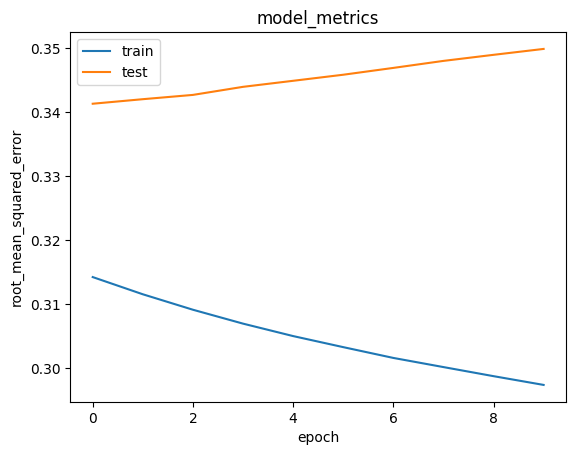

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()